# Laboratorio 2022-2023

##  Sesión 16: Cálculo de áreas por Montecarlo 

Veamos a continuación cómo usar el método de **Montecarlo** (eligiendo puntos aleatoriamente, con distribución uniforme, en un rectángulo) para calcular experimentalmente áreas (y por tanto, indirectamente, integrales). 

Enmarcamos la región $A$ del plano cuya área queremos calcular en una región rectangular adecuada, $R=[a,b]\times[c,d],$  y generamos puntos $(x,y)$ en el rectángulo de forma aleatoria (con distribución uniforme). Esto se puede hacer fácilmente en Sagemath por medio de la instrucción
$$
x,y=\texttt{uniform}(a,b),\texttt{uniform}(c,d).
$$
La probabilidad $P(A)$ de que un punto así elegido caiga en $A$ es el cociente del área de la región por el área del rectángulo:
$$
P(A)=\frac{\text{área}(A)}{\text{área}(R)}.
$$
Puesto que la proporción $p$ de puntos que caen dentro de $A$ en la simulación de Montecarlo es una aproximación de $P(A)$, 
$$
P(A)\approx p, 
$$
concluimos que
$$
\text{área}(A)=P(A)\cdot\text{área}(R)\approx p \cdot\text{área}(R).
$$

**Ejemplo.-** Consideramos el cuadrado $[0,1]\times [0,1]$ y su intersección con la circunferencia de centro el origen y
radio 1. Queremos calcular experimentalmente, con el método que acabamos de describir, el área de este sector circular. Sabemos que es $\pi/4$, así que este método proporciona una forma experimental de calcular el valor de $\pi/4$, y por tanto de $\pi$. 

En este caso es natural tomar como rectángulo que enmarca la región cuya área queremos calcular al cuadrado $[0,1]\times[0,1]$.

In [1]:
a,b=0,1
c,d=0,1
M=1e5
p_dentro,p_fuera=[],[] # Guardaré los puntos que caen dentro y 
                       # fuera para comprobar gráficamente que 
                       # la simulación está bien hecha
dentro=0
for _ in xsrange(M):
    xx,yy=uniform(a,b),uniform(c,d) # Equivalentemente, en este 
                                    # caso podríamos haber tomado
                                    # xx,yy=random(),random()
    if xx*xx+yy*yy<=1:
        p_dentro+=[(xx,yy)]
        dentro+=1
    else:
        p_fuera+=[(xx,yy)]
(dentro/M)*(b-a)*(d-c), (pi/4).n()

(0.787100000000000, 0.785398163397448)

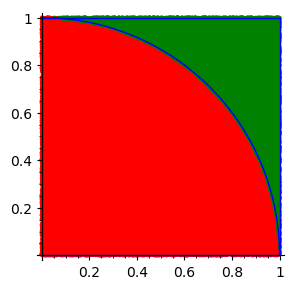

In [2]:
# Hacemos un dibujo para comprobar que hemos hecho bien la 
# simulación

f(x)=sqrt(1-x^2)
figura=plot(f,x,0,1,figsize=4,aspect_ratio=1)
figura+=line([(a,c),(b,c),(b,d),(a,d),(a,c)],color='blue')
figura+=points(p_dentro,color='red')+points(p_fuera,color='green')
show(figura)

**Ejercicio 1.-** Aproximar el área entre las funciones $f(x)=x^2+x$ y $g(x)=x^3+x^2-2x-2$ en el intervalo $[-2,3]$, generando puntos aleatorios en el rectángulo adecuado.

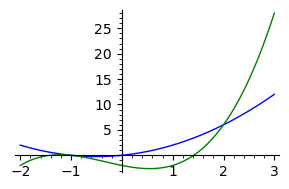

In [1]:
f(x)=x^2+x
g(x)=x^3+x^2-2*x-2
plot(f,x,-2,3,figsize=3)+plot(g,x,-2,3,color='green',figsize=3)

In [2]:
ym1,xm1=find_local_minimum(g,-2,3)
ym1,xm1

(-2.631130309440899, 0.548583770249605)

14.5850126968403 (14.750001940963852, 7.008363256807634e-06)


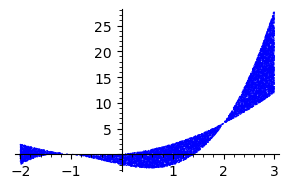

15.659619569778442

In [3]:
t0=walltime()
a,b,c,d=-2.,3.,min((ym1,g(-2))),g(3)
M=10^5
dentro=[]
for _ in xsrange(M):
    xx,yy=uniform(a,b),uniform(c,d)
    if (f(xx)-yy)*(g(xx)-yy)<0:
        dentro.append((xx,yy))
print((len(dentro)/M)*(b-a)*(d-c),integral_numerical(abs(f(x)-g(x)),a,b))
show(points(dentro,pointsize=1,figsize=3))
walltime(t0)

**Ejercicio 2.-** Usar el método de Montecarlo para determinar el área de la región sombreada de la siguiente figura,

![Grafica_Montecarlo](region.png)

formada por los puntos que están en la intersección del círculo de centro $(-1,2)$ y radio 2, el triángulo de vértices $(0,3)$, $(-2,0)$, $(2,0)$ y el interior de la elipse de ecuación $$x^2+2x(y-1)+8(y-1)^2+(y-1)=3$$
que están
bajo la gráfica de la función $f(x)=\frac32+\frac12\cos(5x+2)$.

*Observación:* Para reproducir el dibujo te puede resultar útil la función $\texttt{implicit}\_\texttt{plot}$ de SageMath.

In [9]:
t0=walltime()
a,b,c,d=-2,1,0,2
ARectangulo=(b-a)*(d-c)
M=100000
dentro=[]
for _ in xsrange(M):
    xx,yy=uniform(a,b),uniform(c,d)
    if yy<3/2+cos(5*xx+2)/2 and (xx+1)^2+(yy-2)^2<=4:
        if yy<=3*xx/2+3: 
            if xx^2+2*xx*(yy-1)+8*(yy-1)**2+(yy-1)<=3:
                dentro+=[(xx,yy)]
Area=ARectangulo*len(dentro)/M
print(Area.n())
walltime(t0)

1.72140000000000


1.978909969329834

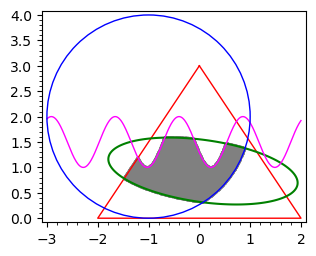

In [10]:
# Comprobamos
x,y=var('x y')
g(x)=3/2+cos(5*x+2)/2
G=points(dentro,pointsize=5,figsize=3,color='grey')
G+=circle((-1,2),2)
G+=line([(0,3),(2,0),(-2,0),(0,3)],color='red')
G+=implicit_plot(x^2+2*x*(y-1)+8*(y-1)**2+(y-1)==3,(x,-3,2),(y,0,2),color='green')
G+=plot(g,x,-3,2,color='magenta',figsize=3)
show(G,figsize=4,frame=True)

**Ejercicio 3.-** La curva descrita en coordenadas polares por $r=1-\cos \theta$, $\theta\in [0,2\pi)$ recibe el nombre de *cardioide*. Ejecuta la celda siguiente para ver qué forma tiene.

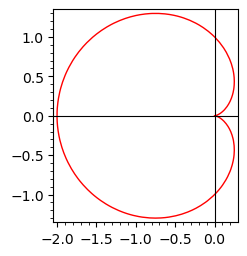

In [12]:
t=var('t')
G=polar_plot(1-cos(t),0,2*pi,color='red')
show(G,figsize=4,frame=True,xmin=-2,xmax=0.25,ymin=-1.3,ymax=1.3)

(a) Estima el área encerrada por la cardioide mediante una simulación de Montecarlo.

4.68994500000000


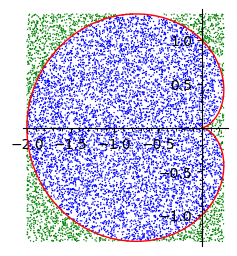

In [13]:
M=10^4
a,b=-2,0.25
c,d=-1.3,1.3
dentro=[]
fuera=[]
for _ in xsrange(M):
    xx=a+(b-a)*random()
    yy=c+(d-c)*random()
    r=sqrt(xx^2+yy^2)
    coseno=xx/r
    if r<1-coseno: ## Condición sobre el integrando
        dentro.append((xx,yy))
    else: 
        fuera.append((xx,yy))
        
print(((b-a)*(d-c)*(len(dentro)/M)).n()) 
G1=G+points(dentro,color='blue',pointsize=1)+points(fuera,color='green',pointsize=1)
G1.show(figsize=4)

(b) El área encerrada por una curva dada en coordenadas polares por la fórmula $r = f(\theta)$, $\theta\in [0, 2\pi)$, es
$$
\text{Área} =\frac12\int_0^{2\pi}f^2(\theta)\,{\rm d}\theta.
$$

Estimar mediante el método de Montecarlo esta integral con $f(\theta)=1-\cos\theta$ y comprobar que coincide aproximadamente con el área encerrada por la cardioide obtenida en el apartado anterior. 

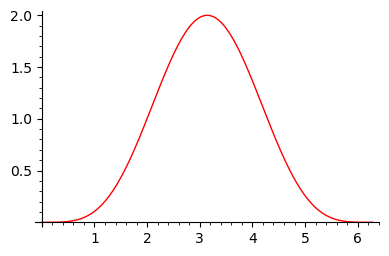

In [14]:
#Empezamos representando la función F(theta)=f^2(theta)/2
F(theta)=(1-cos(theta))^2/2
GF=plot(F,0,2*pi,color='red')
show(GF,figsize=4)

4.78653056700941


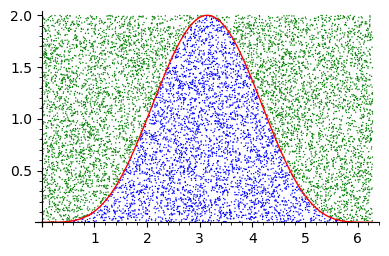

In [17]:
#Hacemos ahora la simulación para calcular el área encerrada por la gráfica de F y el eje horizontal
M=10^4
a,b=0,2*pi
c,d=0,2
dentro=[]
fuera=[]
for _ in xsrange(M):
    #xx=a+(b-a)*random()
    #yy=c+(d-c)*random()
    xx = uniform(a,b)
    yy = uniform(c,d)
    if yy<F(xx): ## Condición sobre el integrando
        dentro.append((xx,yy))
    else: 
        fuera.append((xx,yy))
        
print(((b-a)*(d-c)*(len(dentro)/M)).n()) 
GF1=GF+points(dentro,color='blue',pointsize=1)+points(fuera,color='green',pointsize=1)
GF1.show(figsize=4)

(c) Calcula el área encerrada por la cardioide de manera "exacta" mediante la fórmula del apartado (b) usando alguna de las fórmulas para cálculo de integrales de SageMath.

In [16]:
integrate(F,theta,0,2*pi).n()

4.71238898038469